# 🧪 WHO Life Expectancy Dataset (2000–2015)

This project explores the WHO dataset containing life expectancy and health-related indicators for 183 countries between 2000 and 2015.

**Goals:**
- Identify trends in global and regional life expectancy
- Explore economic, demographic, and health-related factors
- Prepare features for predictive modeling (including ethical modeling)


## 📂 1. Load the Data

Load the dataset and remove rows with missing target values.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tools
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv(r"C:\Users\Sahm9\Work\Digital_Futures\Python\Module4_Predictive_Modelling\5. WHO project\Life Expectancy Data.csv")
df.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
0,Turkiye,Middle East,2015,11.1,13.0,105.8240,1.32,97,65,27.8,...,97,0.08,11006,78.53,4.9,4.8,7.8,0,1,76.5
1,Spain,European Union,2015,2.7,3.3,57.9025,10.35,97,94,26.0,...,97,0.09,25742,46.44,0.6,0.5,9.7,1,0,82.8
2,India,Asia,2007,51.5,67.9,201.0765,1.57,60,35,21.2,...,64,0.13,1076,1183.21,27.1,28.0,5.0,0,1,65.4
3,Guyana,South America,2006,32.8,40.5,222.1965,5.68,93,74,25.3,...,93,0.79,4146,0.75,5.7,5.5,7.9,0,1,67.0
4,Israel,Middle East,2012,3.4,4.3,57.9510,2.89,97,89,27.0,...,94,0.08,33995,7.91,1.2,1.1,12.8,1,0,81.7


In [4]:
df.isnull().sum()

Country                        0
Region                         0
Year                           0
Infant_deaths                  0
Under_five_deaths              0
Adult_mortality                0
Alcohol_consumption            0
Hepatitis_B                    0
Measles                        0
BMI                            0
Polio                          0
Diphtheria                     0
Incidents_HIV                  0
GDP_per_capita                 0
Population_mln                 0
Thinness_ten_nineteen_years    0
Thinness_five_nine_years       0
Schooling                      0
Economy_status_Developed       0
Economy_status_Developing      0
Life_expectancy                0
dtype: int64

In [5]:
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

In [6]:
df.describe(include = 'all')

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy
count,2864,2864,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,...,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000,2864.000000
unique,179,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Turkiye,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2007.500000,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,...,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.206704,0.793296,68.856075
std,NaN,NaN,4.610577,27.538117,44.569974,114.910281,3.981949,15.995511,18.659693,2.193905,...,15.534225,2.381389,16934.788931,136.485867,4.438234,4.525217,3.171556,0.405012,0.405012,9.405608
min,NaN,NaN,2000.000000,1.800000,2.300000,49.384000,0.000000,12.000000,10.000000,19.800000,...,16.000000,0.010000,148.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000,39.400000
25%,NaN,NaN,2003.750000,8.100000,9.675000,106.910250,1.200000,78.000000,64.000000,23.200000,...,81.000000,0.080000,1415.750000,2.097500,1.600000,1.600000,5.100000,0.000000,1.000000,62.700000
50%,NaN,NaN,2007.500000,19.600000,23.100000,163.841500,4.020000,89.000000,83.000000,25.500000,...,93.000000,0.150000,4217.000000,7.850000,3.300000,3.400000,7.800000,0.000000,1.000000,71.400000
75%,NaN,NaN,2011.250000,47.350000,66.000000,246.791375,7.777500,96.000000,93.000000,26.400000,...,97.000000,0.460000,12557.000000,23.687500,7.200000,7.300000,10.300000,0.000000,1.000000,75.400000


## 📊 2. Exploratory Data Analysis (EDA)

We will explore trends, distributions, and relationships between features such as life expectancy, GDP per capita, health indicators, and regional differences.


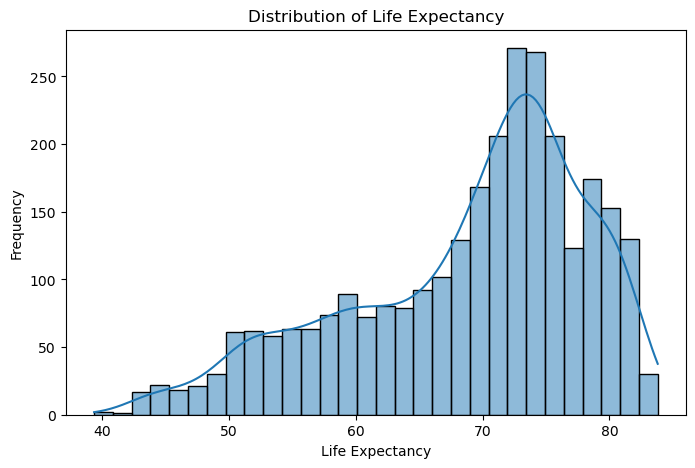

In [2]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Life_expectancy'], kde=True, bins=30)
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()


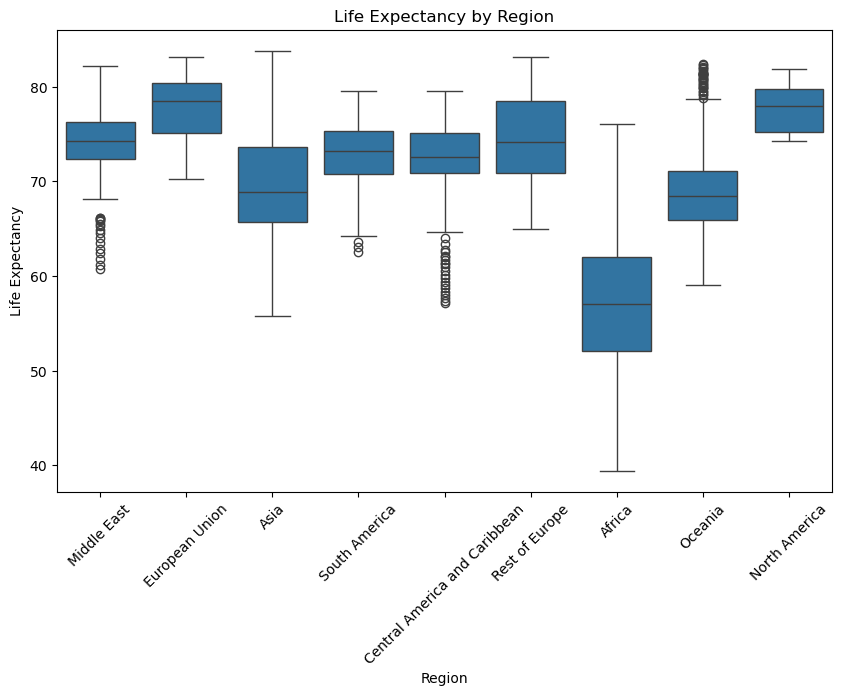

In [3]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Life_expectancy')
plt.xticks(rotation=45)
plt.title("Life Expectancy by Region")
plt.ylabel("Life Expectancy")
plt.xlabel("Region")
plt.show()


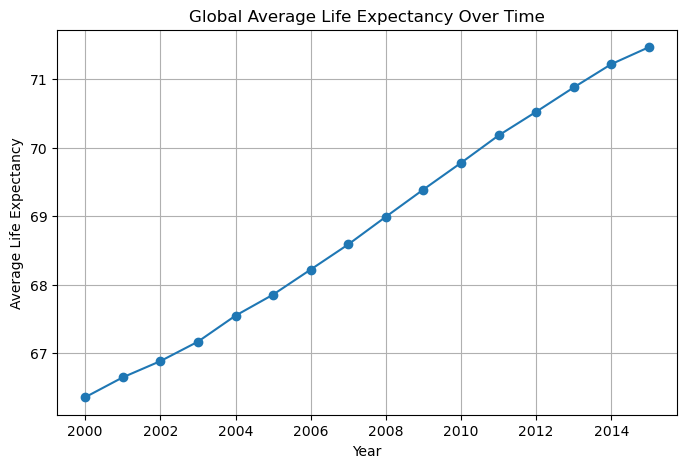

In [3]:
plt.figure(figsize=(8, 5))
df.groupby('Year')['Life_expectancy'].mean().plot(marker='o')
plt.title("Global Average Life Expectancy Over Time")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.grid(True)
plt.show()


In [20]:
newdf = df.corr(numeric_only = True)
newdf[['Life_expectancy']]

,Life_expectancy
Year,0.174359
Infant_deaths,-0.920032
Under_five_deaths,-0.920419
Adult_mortality,-0.945360
Alcohol_consumption,0.399159
Hepatitis_B,0.417804
Measles,0.490019
BMI,0.598423
Polio,0.641217
Diphtheria,0.627541


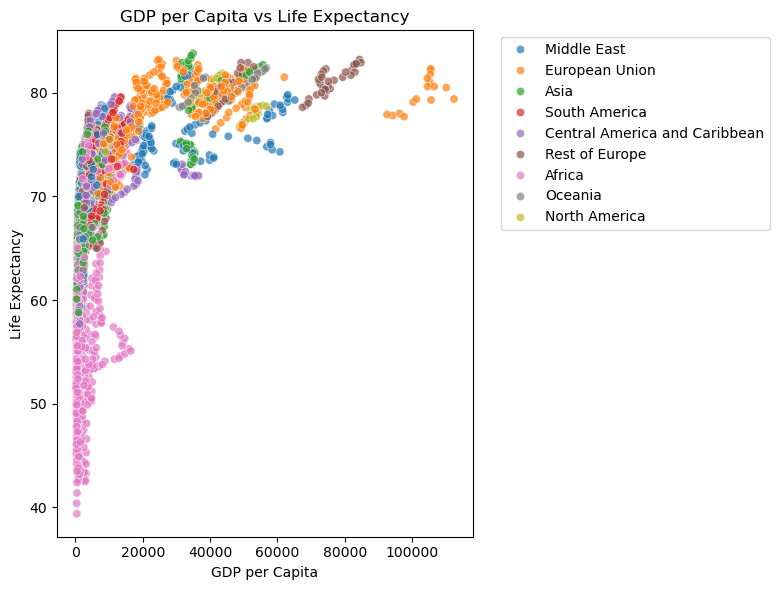

In [5]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='GDP_per_capita', y='Life_expectancy', hue='Region', alpha=0.7)
plt.title("GDP per Capita vs Life Expectancy")
plt.xlabel("GDP per Capita")
plt.ylabel("Life Expectancy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


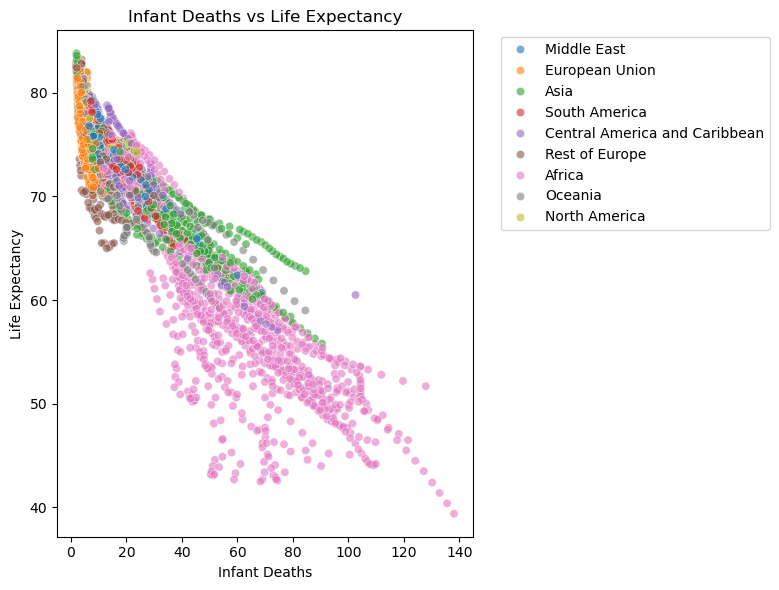

In [6]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Infant_deaths', y='Life_expectancy', hue='Region', alpha=0.6)
plt.title("Infant Deaths vs Life Expectancy")
plt.xlabel("Infant Deaths")
plt.ylabel("Life Expectancy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


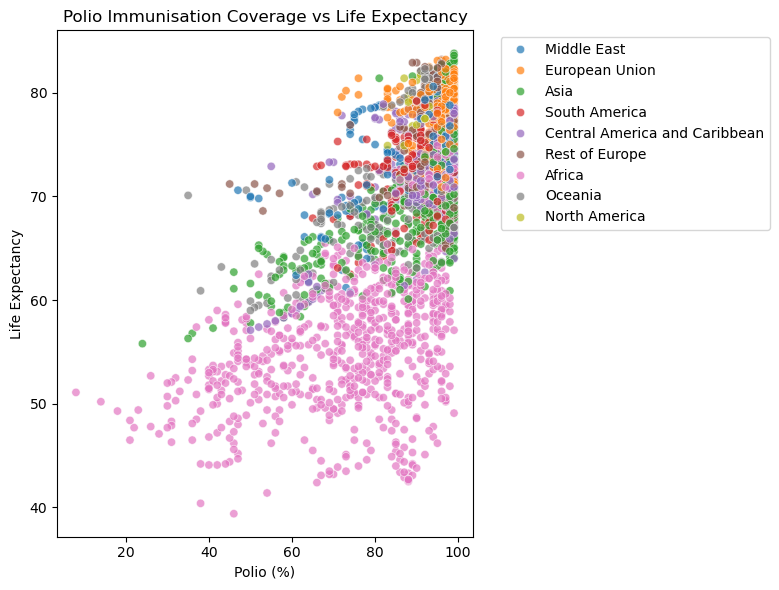

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Polio', y='Life_expectancy', hue='Region', alpha=0.7)
plt.title("Polio Immunisation Coverage vs Life Expectancy")
plt.xlabel("Polio (%)")
plt.ylabel("Life Expectancy")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


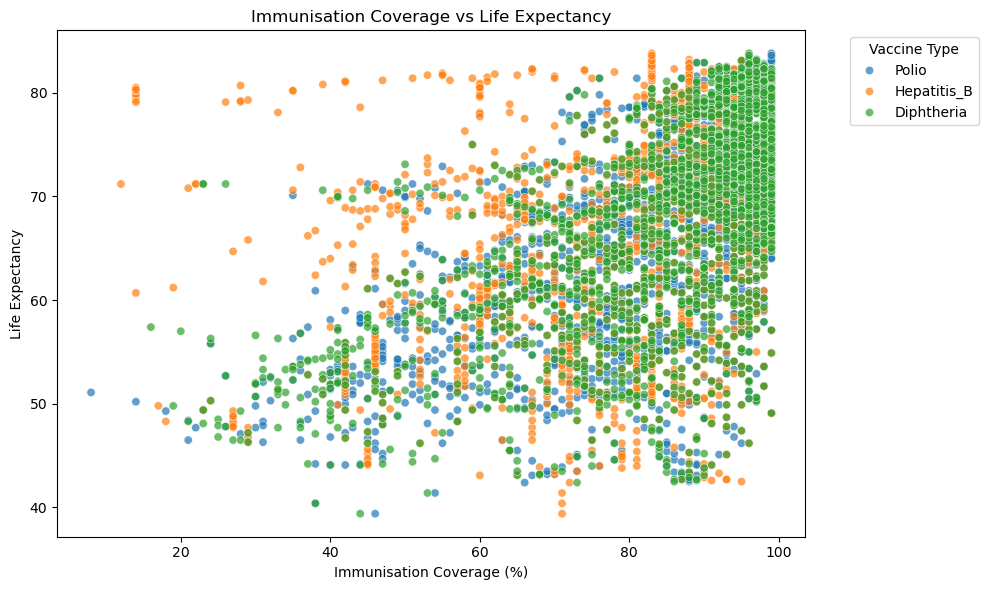

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reshape your dataframe to long format for combined vaccine plotting
vaccine_cols = ['Polio', 'Hepatitis_B', 'Diphtheria']
df_vaccine = df[['Life_expectancy', 'Region'] + vaccine_cols].melt(
    id_vars=['Life_expectancy', 'Region'],
    var_name='Vaccine',
    value_name='Coverage'
)

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_vaccine, x='Coverage', y='Life_expectancy', hue='Vaccine', alpha=0.7)
plt.title("Immunisation Coverage vs Life Expectancy")
plt.xlabel("Immunisation Coverage (%)")
plt.ylabel("Life Expectancy")
plt.legend(title='Vaccine Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


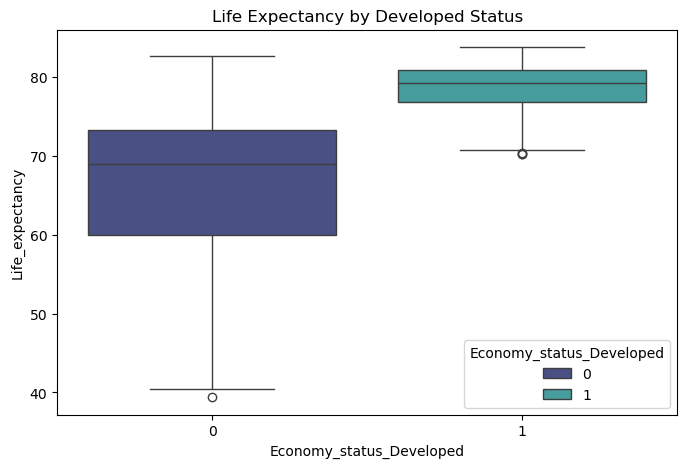

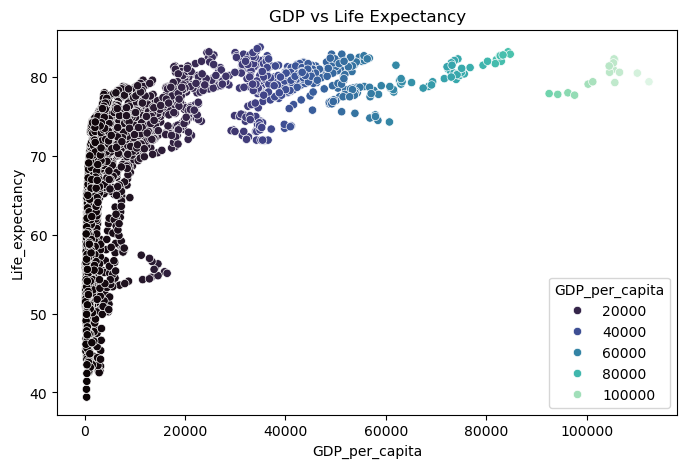

In [30]:
# Economy Status
plt.figure(figsize=(8, 5))
sns.boxplot(x='Economy_status_Developed', y='Life_expectancy',  data=df, palette = 'mako', hue = 'Economy_status_Developed')
plt.title("Life Expectancy by Developed Status")
plt.show()

# GDP vs Life Expectancy
plt.figure(figsize=(8, 5))
sns.scatterplot(x='GDP_per_capita', y='Life_expectancy',  data=df, palette = 'mako', hue = 'GDP_per_capita')
plt.title("GDP vs Life Expectancy")
plt.show()


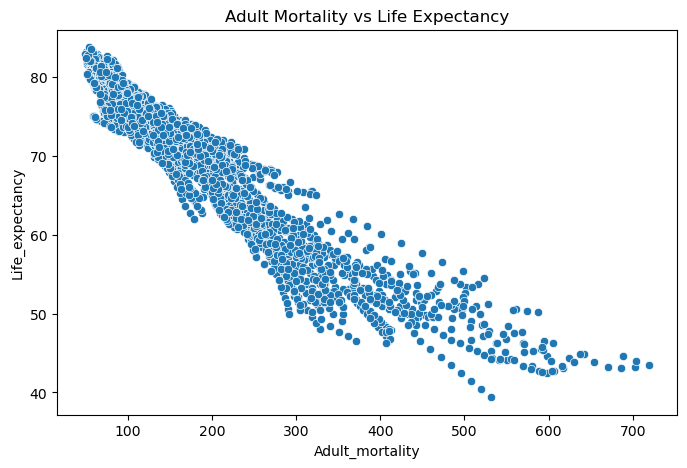

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Adult_mortality', y='Life_expectancy')
plt.title("Adult Mortality vs Life Expectancy")
plt.show()

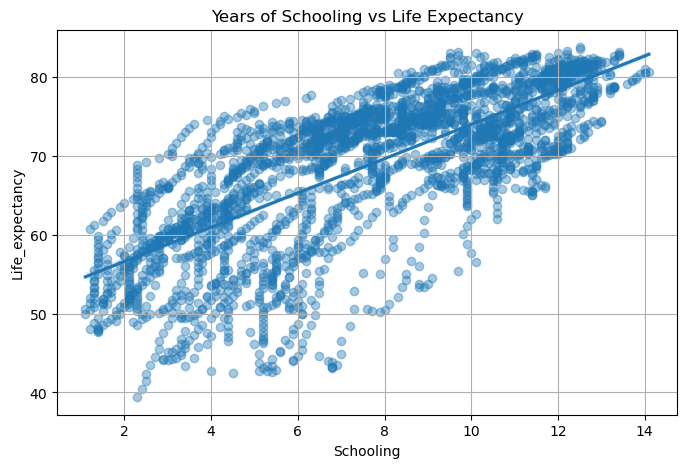

In [11]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='Schooling', y='Life_expectancy', scatter_kws={'alpha':0.4})
plt.title("Years of Schooling vs Life Expectancy")
plt.grid(True)
plt.show()

# EDA - Observations and Task List:

## **Notebook observations:**

* Correlation tells you positive and negative influences for model targets.
* Lots of positive correlations for diseases? Seems wrong? - Actually, it's immunisation rates, not diseases, which makes more sense.
* OHE for country and region.
* infant deaths, under 5 deaths, adult mortality, alcohol, incidents hiv are the metrics to exclude from the ethical model.

## **Task List:**
* No Nulls so no need to drop anything.
* Need to label encode the Country. OHE for countries will create too many columns.
* OHE the Region.
* Need to apply scaling to remove effect of outliers.
* Decide features for ethical model.
* Include either developed or developing economy status, not both, as they describe the same thing.
* Decide if we would like new columns we want to add, like a weight for each country to decide the life expectancy.